In [11]:
# noise reduction
import cv2
from skimage import io, img_as_float
from skimage.filters import gaussian
from matplotlib import pyplot as plt

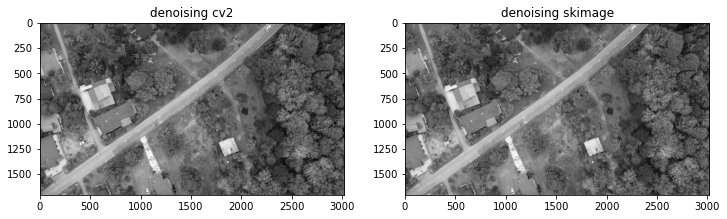

In [12]:
# skimage - needs float
img = img_as_float(io.imread('../sample/1.png', as_gray=True))

# using cv2 - kernel 3*3
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
# using skimage
gaussian_using_skimage = gaussian(img, sigma=0.1, mode='constant', cval=0.0)

plt.figure(figsize=(12,6))

plt.subplot(121) # 1 row 2 columns
plt.title('denoising cv2')
plt.imshow(gaussian_using_cv2, cmap='gray')

plt.subplot(122)
plt.title('denoising skimage')
plt.imshow(gaussian_using_skimage, cmap='gray')

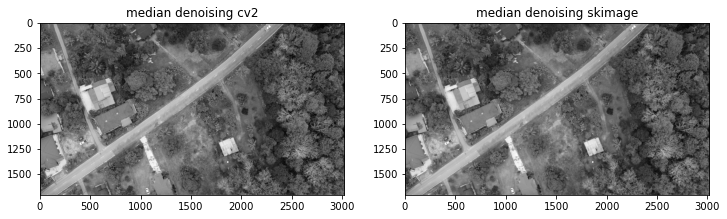

In [14]:
# better noise reduction - median
from skimage.filters import median
from skimage.morphology import disk

# cv2 - needs 8 bit, not float
img = cv2.imread('../sample/1.png', 0)

# median using cv2 
median_img_cv2 = cv2.medianBlur(img, 3)
# median using skiamge - kernel size 3
median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)

plt.figure(figsize=(12,6))

plt.subplot(121) # 1 row 2 columns
plt.title('median denoising cv2')
plt.imshow(median_img_cv2, cmap='gray')

plt.subplot(122)
plt.title('median denoising skimage')
plt.imshow(median_using_skimage, cmap='gray')

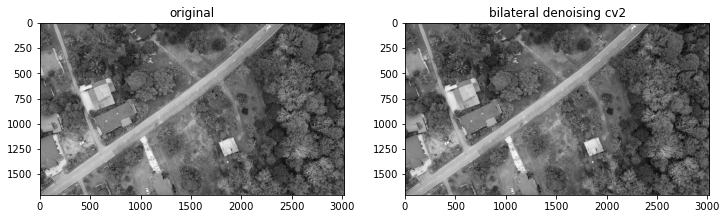

In [18]:
# Denoising using Bilateral filter
# if you have a lot of edges


# cv2 - needs 8 bit, not float
img = cv2.imread('../sample/1.png', 0)

# kernel size or diameter = 5, sigma color = 20, sigma space = 100
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

plt.figure(figsize=(12,6))

plt.subplot(121) # 1 row 2 columns
plt.title('original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('bilateral denoising cv2')
plt.imshow(bilateral_using_cv2, cmap='gray')

/var/folders/39/8ws68thx3xq2pw3b6qx114lw0000gn/T/ipykernel_64741/4023380462.py:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, multichannel=False)


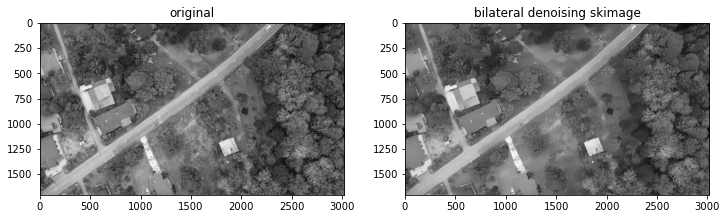

In [19]:
# it is too slow!!!!!
# Denoising using Bilateral filter - skimage
from skimage.restoration import denoise_bilateral

# cv2 - needs 8 bit, not float
img = cv2.imread('../sample/1.png', 0)

bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, multichannel=False)

plt.figure(figsize=(12,6))

plt.subplot(121) # 1 row 2 columns
plt.title('original')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('bilateral denoising skimage')
plt.imshow(bilateral_using_skimage, cmap='gray')

/var/folders/39/8ws68thx3xq2pw3b6qx114lw0000gn/T/ipykernel_64741/1001204042.py:12: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img, multichannel=True))
/var/folders/39/8ws68thx3xq2pw3b6qx114lw0000gn/T/ipykernel_64741/1001204042.py:14: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True,


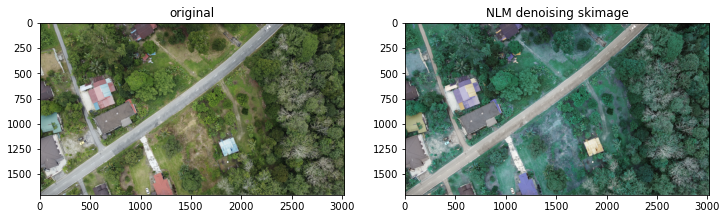

In [24]:
# Denoising using Non-local means (NLM) filter
import cv2
import numpy as np
from skimage import img_as_ubyte
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

# denoise_nl_means will work on color and grayscale
img = img_as_float(io.imread('../sample/1.png', as_gray=False))

# estimate sigma from image instead of guessing 
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

denoise_img = denoise_nl_means(img, h=1.15*sigma_est, fast_mode=True,
                              patch_size=5, patch_distance=3, multichannel=True)

# convert float to 8 byte
img_as_8byte = img_as_ubyte(img)
denoise_img_as_8byte = img_as_ubyte(img_as_8byte)
original_img = cv2.cvtColor(img_as_8byte, cv2.COLOR_BGR2RGB)
final_denoised_img = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))

plt.subplot(121) # 1 row 2 columns
plt.title('original')
plt.imshow(img)

plt.subplot(122)
plt.title('NLM denoising skimage')
plt.imshow(final_denoised_img)

(array([   7522.,   21251.,   24324.,   65463.,   60720.,  101521.,
          75911.,  129542.,   96398.,  164762.,  186417.,  135858.,
         225215.,  159284.,  252700.,  185433.,  285238.,  196411.,
         316851.,  216093.,  332795.,  353897.,  237062.,  357494.,
         244218.,  376715.,  246780.,  367871.,  238941.,  364903.,
         363414.,  248530.,  355235.,  234420.,  344556.,  235002.,
         353115.,  247603.,  345207.,  226530.,  324141.,  322290.,
         210391.,  323412.,  202818.,  298214.,  193691.,  284712.,
         189958.,  283811.,  285623.,  176511.,  254629.,  159990.,
         223963.,  135235.,  176981.,  110740.,  152469.,   94096.,
         133611.,  128837.,   95088.,  125710.,   83625.,  121109.,
          77407.,  109354.,   64759.,   93069.,   90353.,   59837.,
          94267.,   66829.,  115050.,   71172.,   91465.,   47599.,
          53034.,   24311.,   28912.,   24989.,   18423.,   24845.,
          16541.,   28308.,   19718.,   29338., 

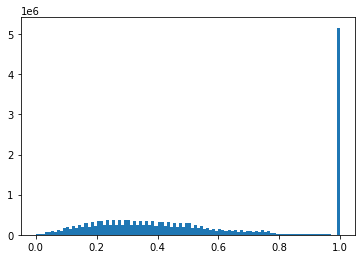

In [27]:
# Denoising using total variation filter (TVF)
import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle

img = img_as_float(io.imread('../sample/1.png'))

plt.hist(img.flat, bins=100, range=(0,1))

/var/folders/39/8ws68thx3xq2pw3b6qx114lw0000gn/T/ipykernel_64741/509426300.py:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.00002,


(array([0.000000e+00, 0.000000e+00, 2.700000e+01, 9.790000e+02,
        6.866000e+03, 1.573900e+04, 2.822500e+04, 4.415100e+04,
        6.466600e+04, 8.939000e+04, 1.146260e+05, 1.450210e+05,
        1.751930e+05, 2.009540e+05, 2.243480e+05, 2.490680e+05,
        2.668040e+05, 2.846330e+05, 3.016620e+05, 3.214210e+05,
        3.350070e+05, 3.476600e+05, 3.496370e+05, 3.518630e+05,
        3.489120e+05, 3.469450e+05, 3.448680e+05, 3.441550e+05,
        3.413780e+05, 3.400250e+05, 3.329540e+05, 3.306180e+05,
        3.334720e+05, 3.353980e+05, 3.365590e+05, 3.337290e+05,
        3.379680e+05, 3.360730e+05, 3.301070e+05, 3.208810e+05,
        3.068900e+05, 2.960560e+05, 2.872580e+05, 2.786700e+05,
        2.689520e+05, 2.602990e+05, 2.472340e+05, 2.432760e+05,
        2.449550e+05, 2.343450e+05, 2.261720e+05, 2.154260e+05,
        1.983480e+05, 1.875160e+05, 1.720070e+05, 1.552410e+05,
        1.314420e+05, 1.175200e+05, 1.086640e+05, 9.833400e+04,
        9.630100e+04, 9.441800e+04, 9.57

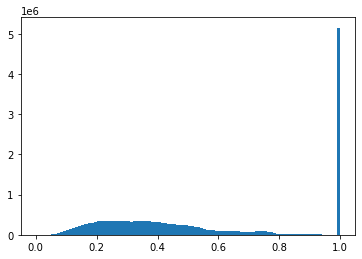

In [29]:
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.00002, 
                                   max_num_iter= 200,
                                   multichannel=True)

plt.hist(denoise_img.flat, bins=100, range=(0,1))